In [2]:
import sys
sys.path.append("../")
import re
from src.database.firebase_manager import get_firebase_data, connect_to_firebase
connect_to_firebase()
import seaborn as sns
import pandas as pd
import numpy as np
import folium

In [14]:
data_perdiz = get_firebase_data("Perdizes, São Paulo")
data_consol = get_firebase_data("Consolação, São Paulo")
data_liberd = get_firebase_data("Liberdade, São Paulo")

df_perdiz = pd.DataFrame(data_perdiz)
df_consol = pd.DataFrame(data_consol)
df_liberd = pd.DataFrame(data_liberd)

In [15]:
df = pd.concat([df_consol, df_perdiz, df_liberd], ignore_index = True)

In [16]:
def skip_nans(df):
    df.vagas.fillna("Não especificado", inplace=True)
    df.quartos.fillna("Não especificado", inplace=True)
    df["área"].fillna("Não especificado", inplace=True)
skip_nans(df)

In [19]:
first_sixth = np.quantile(df.preço, 1/6)
last_sixth = np.quantile(df.preço, 5/6)

# Criando nosso mapa
m = folium.Map(location=[-23.5558, -46.6396], zoom_start=13)

for lat,lon,preco,n_quartos,n_banheiros,n_vagas,area,link,img  in zip(df.lat, df.lon, df['preço'], df['quartos'], df['banheiros'], df['vagas'], df['área'], df.link, df.img1):
    if isinstance(n_vagas, float):
        n_vagas = int(n_vagas)
    html = f'''
    <img src="{img}" alt="Foto anúncio" style="width:100%;">
    <table id="vertical-1" class="centerTable">
      <tr>
        <th>Aluguel</th>
        <td>R$ {preco},00</td>
      </tr>
      <tr>
        <th>Quartos</th>
        <td>{n_quartos}</td>
      </tr>
      <tr>
        <th>Banheiros</th>
        <td>{n_banheiros}</td>
      </tr>
      <tr>
        <th>Vagas</th>
        <td>{n_vagas}</td>
      </tr>
      <tr>
        <th>Área</th>
        <td>{area} m²</td>
      </tr>
    </table>
    <div style="text-align:center">
        <a href="{link}">link</a>
    </div>'''
    iframe = folium.IFrame(html,
                       width=250,
                       height=400)
    popup = folium.Popup(iframe)
    if preco <= first_sixth:
        color="green"
    elif preco < last_sixth:
        color="orange"
    else:
        color="red"
    folium.Marker(
        location=[lat, lon],
        popup=popup,
        icon=folium.Icon(icon="building", prefix="fa", color=color),
    ).add_to(m)

In [20]:
m

<AxesSubplot:xlabel='preço', ylabel='Count'>

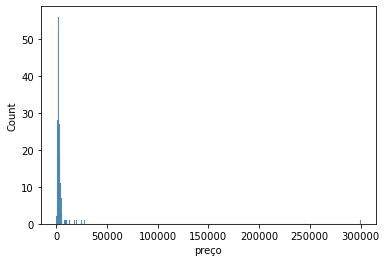

In [12]:
sns.histplot(df.preço)

<AxesSubplot:xlabel='preço', ylabel='Count'>

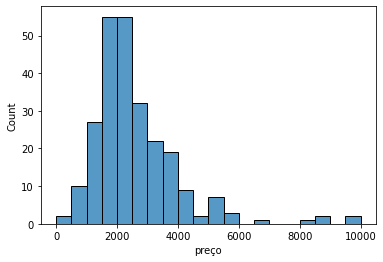

In [13]:
sns.histplot(df[df.preço < np.quantile(df.preço, 0.95)].preço, binwidth=500)